IMPORTING LIBRARIES

In [8]:
import numpy as np
import pandas as pd

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

READING THE DATA

In [2]:
superster_sales = pd.read_excel('US Superstore data.xls')
superster_sales.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1070,1071,CA-2015-144652,2015-11-20,2015-11-26,Standard Class,SN-20560,Skye Norling,Home Office,United States,Los Angeles,...,90008,West,OFF-AR-10003732,Office Supplies,Art,Newell 333,19.460,7,0.0,5.0596
4361,4362,US-2017-163195,2017-02-17,2017-02-21,Second Class,LL-16840,Lauren Leatherbury,Consumer,United States,Lafayette,...,70506,South,TEC-PH-10003875,Technology,Phones,KLD Oscar II Style Snap-on Ultra Thin Side Fli...,29.160,3,0.0,8.4564
4552,4553,US-2014-106334,2014-12-27,2015-01-02,Standard Class,JF-15490,Jeremy Farry,Consumer,United States,San Francisco,...,94122,West,FUR-CH-10004886,Furniture,Chairs,Bevis Steel Folding Chairs,230.280,3,0.2,23.0280
7819,7820,CA-2017-150469,2017-01-26,2017-01-30,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,San Francisco,...,94109,West,OFF-FA-10000611,Office Supplies,Fasteners,Binder Clips by OIC,11.840,8,0.0,5.6832
2972,2973,CA-2017-167941,2017-11-06,2017-11-09,Second Class,JF-15565,Jill Fjeld,Consumer,United States,Fayetteville,...,28314,South,OFF-ST-10000736,Office Supplies,Storage,Carina Double Wide Media Storage Towers in Nat...,259.136,4,0.2,-51.8272


EXPLORATORY DATA

In [3]:
df = superster_sales.copy()

In [4]:
df.shape

(9994, 21)

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

drop unnecessary columns

In [10]:
df=df.drop('Row ID',axis=1)

In [11]:
df['Country'].value_counts()

Country
United States    9994
Name: count, dtype: int64

In [12]:
df=df.drop('Country',axis=1)

review the product categories available

In [14]:
category_counts = df['Category'].value_counts()
category_counts

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

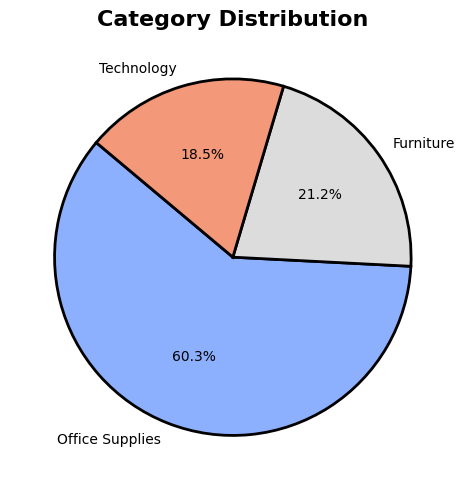

In [15]:
fig, axs = plt.subplots(figsize=(5, 5))

axs.pie(category_counts, 
           labels=category_counts.index, 
           autopct='%1.1f%%', 
           startangle=140, 
           colors=sns.color_palette('coolwarm', len(category_counts)),
           wedgeprops={'edgecolor': 'black', 'linewidth': 2})
axs.set_title('Category Distribution', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

In [20]:
print('unique Sub-Category : ', df['Sub-Category'].nunique())
subcategory_counts = df.groupby('Category')['Sub-Category'].value_counts().reset_index(name='Count')
subcategory_counts

unique Sub-Category :  17


,Category,Sub-Category,Count
0,Furniture,Furnishings,957
1,Furniture,Chairs,617
2,Furniture,Tables,319
3,Furniture,Bookcases,228
4,Office Supplies,Binders,1523
5,Office Supplies,Paper,1370
6,Office Supplies,Storage,846
7,Office Supplies,Art,796
8,Office Supplies,Appliances,466
9,Office Supplies,Labels,364


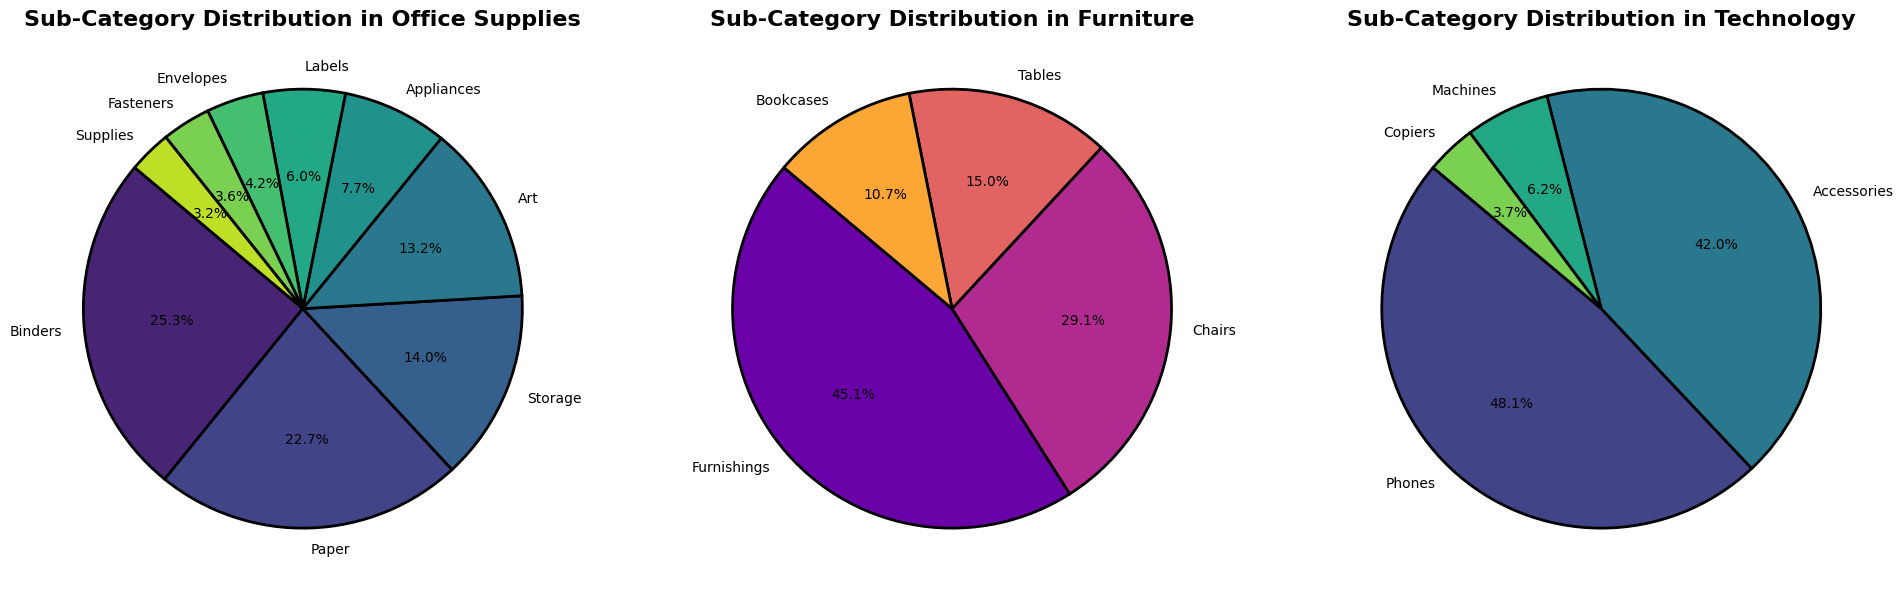

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

category_1 = category_counts.index[0]
subcategory_data_1 = subcategory_counts[subcategory_counts['Category'] == category_1]
axs[0].pie(subcategory_data_1['Count'], 
           labels=subcategory_data_1['Sub-Category'], 
           autopct='%1.1f%%', 
           startangle=140, 
           colors=sns.color_palette('viridis', len(subcategory_data_1)),
           wedgeprops={'edgecolor': 'black', 'linewidth': 2})
axs[0].set_title(f'Sub-Category Distribution in {category_1}', fontsize=16, fontweight='bold')

category_2 = category_counts.index[1]
subcategory_data_2 = subcategory_counts[subcategory_counts['Category'] == category_2]
axs[1].pie(subcategory_data_2['Count'], 
           labels=subcategory_data_2['Sub-Category'], 
           autopct='%1.1f%%', 
           startangle=140, 
           colors=sns.color_palette('plasma', len(subcategory_data_2)),
           wedgeprops={'edgecolor': 'black', 'linewidth': 2})
axs[1].set_title(f'Sub-Category Distribution in {category_2}', fontsize=16, fontweight='bold')

category_3 = category_counts.index[2]
subcategory_data_3 = subcategory_counts[subcategory_counts['Category'] == category_3]
axs[2].pie(subcategory_data_3['Count'], 
           labels=subcategory_data_3['Sub-Category'], 
           autopct='%1.1f%%', 
           startangle=140, 
           colors=sns.color_palette('viridis', len(subcategory_data_3)),
           wedgeprops={'edgecolor': 'black', 'linewidth': 2})
axs[2].set_title(f'Sub-Category Distribution in {category_3}', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

in general

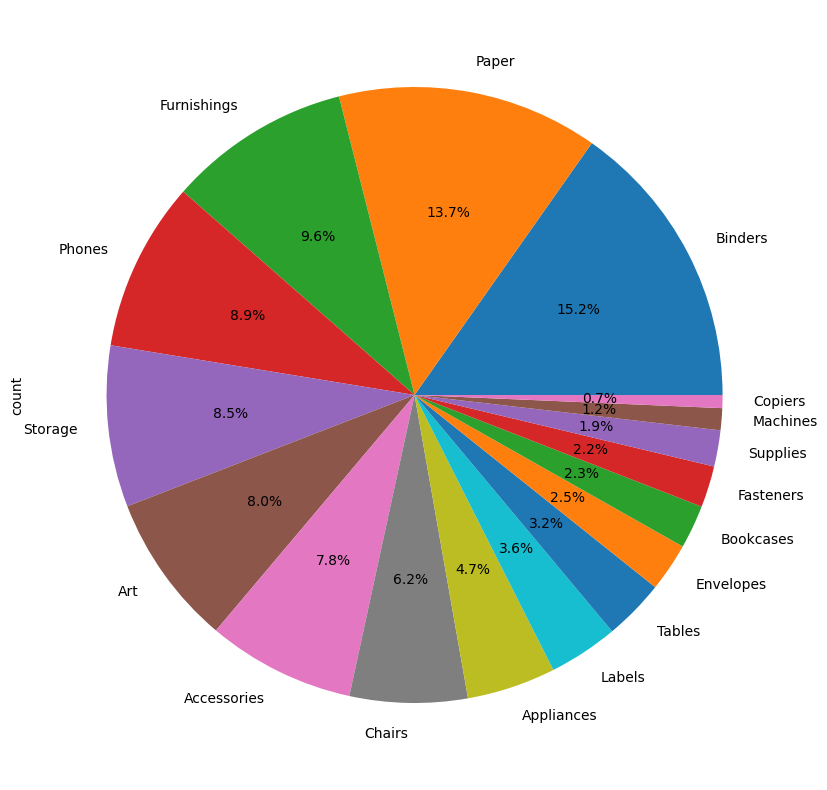

In [18]:
plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

Review of sales and profits

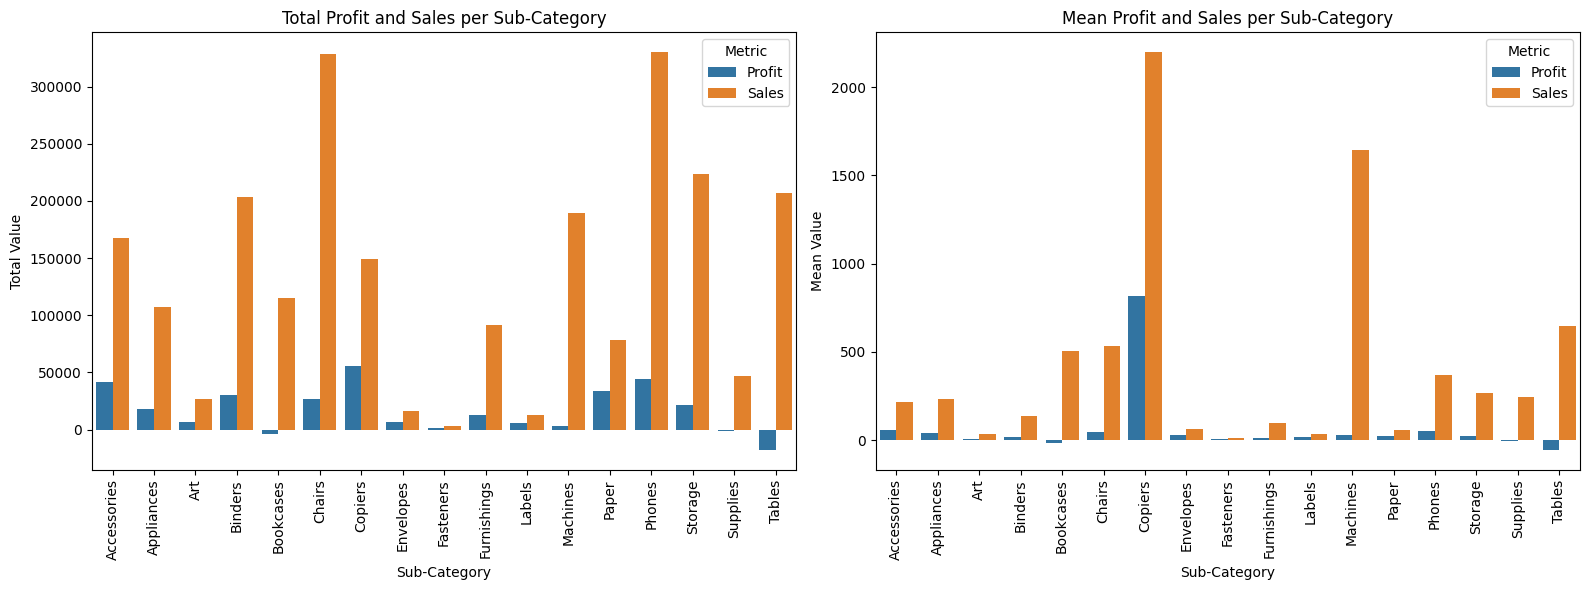

In [27]:
grouped_sum = df.groupby('Sub-Category')[['Profit', 'Sales']].sum().reset_index()
grouped_mean = df.groupby('Sub-Category')[['Profit', 'Sales']].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(data=grouped_sum.melt(id_vars='Sub-Category', var_name='Metric', value_name='Value'),
            x='Sub-Category', y='Value', hue='Metric', ax=axes[0])
axes[0].set_title('Total Profit and Sales per Sub-Category')
axes[0].set_ylabel('Total Value')
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(data=grouped_mean.melt(id_vars='Sub-Category', var_name='Metric', value_name='Value'),
            x='Sub-Category', y='Value', hue='Metric', ax=axes[1])
axes[1].set_title('Mean Profit and Sales per Sub-Category')
axes[1].set_ylabel('Mean Value')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

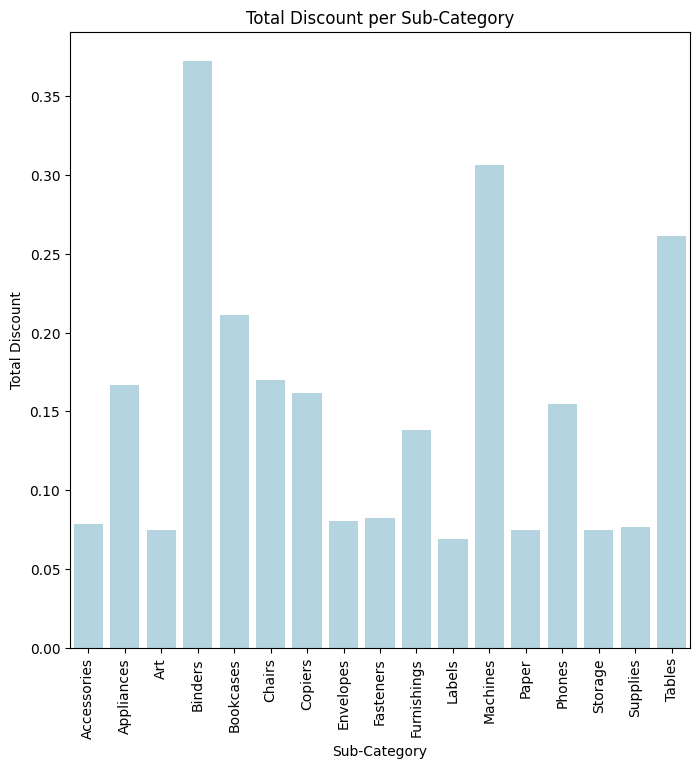

In [ ]:
grouped_discount_mean = df.groupby('Sub-Category')['Discount'].mean().reset_index()

fig, axes = plt.subplots(figsize=(8, 8))

sns.barplot(data=grouped_discount_mean, x='Sub-Category', y='Discount', ax=axes, color='lightblue')
axes.set_title('Mean Discount per Sub-Category')
axes.set_ylabel('Mean Discount')
axes.tick_params(axis='x', rotation=90)

<h4>The store's discount system has a problem</h4>

->Best-selling products can be sold with no discount or with a partial discount

->Products that are causing damage to the store should be sold without discount

->Products with limited sales and higher profitability should be sold at a higher discount to attract customers

review of the sales of different parts of the US

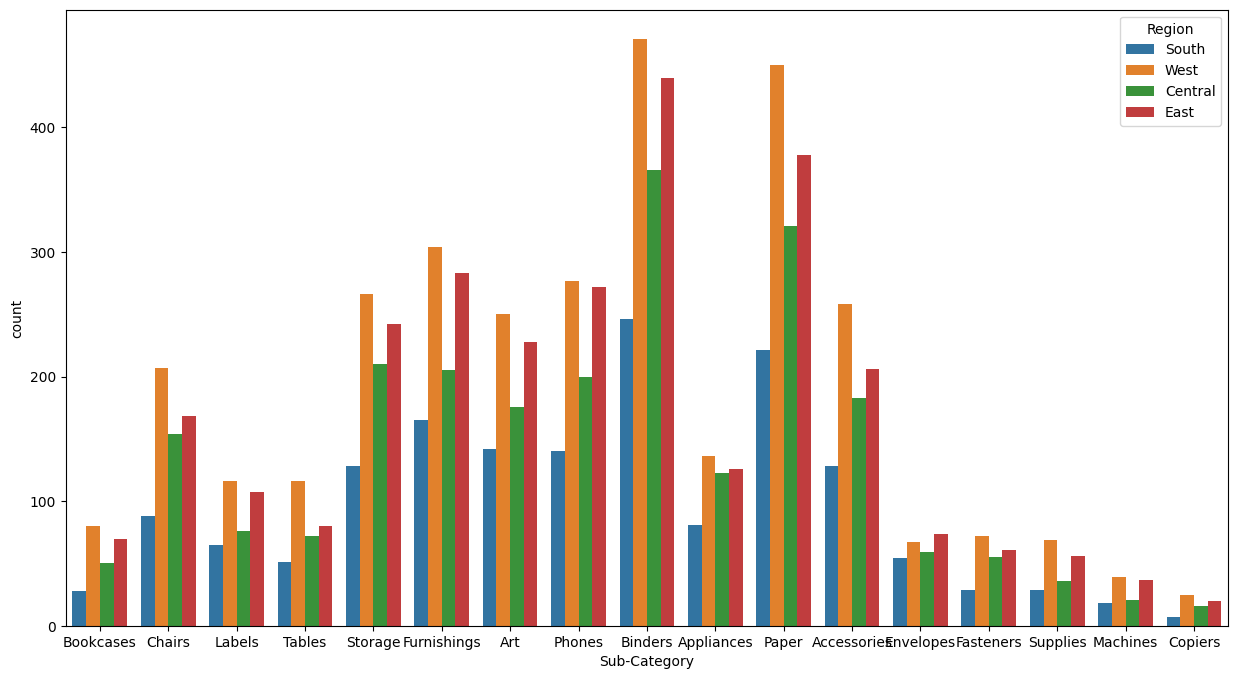

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.show()

<h5>People in the west and east are more likely to shop in department superstores than in the south and center.</h5>